In [1]:
## Import Necessary Functions 
import numpy as np
import matplotlib.pyplot as plt



#You will use Vine Dataset you can get the detail in the URL below
#https://archive.ics.uci.edu/ml/datasets/Wine

from sklearn.datasets import load_wine
vine = load_wine()

In [2]:
# PRINT FOR YOUR INTUITION SO YOU KNOW THE DIMENSIONS YOU ARE WORKING WITH
print(vine.data.shape) #.data contains the features
print(vine.target.shape)
print(vine.target[0]) #.target contains the target variables
print(vine.target_names.shape)
print(vine.feature_names)

(178, 13)
(178,)
0
(3,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
#SPLIT THE DATA INTO TRAINING AND TESTING SET
#WHEN CALLING THE DATA use vine.data instance as well as vine.target.astype('int')
#THE SPLIT OF DATA IS UPTO YOU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X, y = load_wine(return_X_y=True)
y = to_categorical(y)



X2_train, X2_test, y2_train, y2_test = train_test_split(X, y,random_state=104,test_size=0.3,shuffle=True)

2023-04-10 19:14:14.349554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
X2_train.shape, X2_test.shape


((124, 13), (54, 13))

In [5]:
y2_train.shape, y2_test.shape

((124, 3), (54, 3))

In [6]:
print(y2_train)



[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0.

In [7]:
print(X2_train)

[[1.165e+01 1.670e+00 2.620e+00 ... 1.360e+00 3.210e+00 5.620e+02]
 [1.383e+01 1.570e+00 2.620e+00 ... 1.130e+00 2.570e+00 1.130e+03]
 [1.184e+01 8.900e-01 2.580e+00 ... 7.900e-01 3.080e+00 5.200e+02]
 ...
 [1.345e+01 3.700e+00 2.600e+00 ... 8.500e-01 1.560e+00 6.950e+02]
 [1.352e+01 3.170e+00 2.720e+00 ... 8.900e-01 2.060e+00 5.200e+02]
 [1.221e+01 1.190e+00 1.750e+00 ... 1.280e+00 3.070e+00 7.180e+02]]


In [8]:
import tensorflow as tf

print(tf.__version__)


2.11.0


In [9]:
input_dim = X2_train.shape[1:]
output_dim = y.shape[1]

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_dim),
    #tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])


In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [12]:
testing = model.fit(X2_train, y2_train, epochs=100,validation_data=(X2_test,y2_test))


Epoch 1/100
4/4 [==============================] - 3s 59ms/step - loss: 1.0229 - accuracy: 0.7016 - precision: 1.0000 - recall: 0.1048 - val_loss: 0.9391 - val_accuracy: 0.6914 - val_precision: 0.5769 - val_recall: 0.2778
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6595 - accuracy: 0.8522 - precision: 0.9859 - recall: 0.5645 - val_loss: 0.7739 - val_accuracy: 0.7593 - val_precision: 0.6471 - val_recall: 0.6111
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4370 - accuracy: 0.9462 - precision: 0.9727 - recall: 0.8629 - val_loss: 1.1619 - val_accuracy: 0.6605 - val_precision: 0.4906 - val_recall: 0.4815
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.9839 - precision: 0.9917 - recall: 0.9597 - val_loss: 1.8216 - val_accuracy: 0.6420 - val_precision: 0.4630 - val_recall: 0.4630
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1991 - accuracy: 0.9785 - precision: 0.983

In [13]:



print('\nTest accuracy:', testing.history['accuracy'])



Test accuracy: [0.7016128897666931, 0.852150559425354, 0.9462365508079529, 0.9838709831237793, 0.9784946441650391, 0.9919354915618896, 0.9919354915618896, 1.0, 0.9946236610412598, 1.0, 0.9838709831237793, 1.0, 1.0, 1.0, 0.9892473220825195, 0.9865591526031494, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9946236610412598, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9892473220825195, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9946236610412598, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9946236610412598, 1.0, 1.0, 0.9946236610412598, 1.0, 0.9865591526031494, 1.0, 1.0, 1.0, 1.0, 0.9946236610412598, 1.0, 1.0, 1.0, 1.0, 0.9946236610412598, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


2/2 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.9753 - precision: 0.9630 - recall: 0.9630

Test accuracy: [0.1335313320159912, 0.9753086566925049, 0.9629629850387573, 0.9629629850387573]


<function matplotlib.pyplot.show(close=None, block=None)>

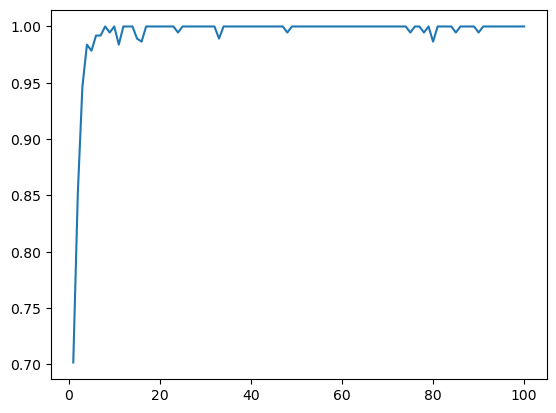

In [14]:
test_acc = model.evaluate(X2_test, y2_test)


print('\nTest accuracy:', test_acc)

plt.plot(
    np.arange(1, 101), 
    testing.history['accuracy'], label='Accuracy'
)
plt.show

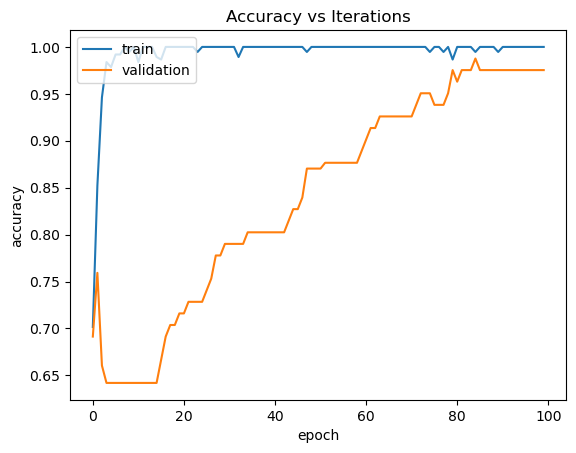

In [15]:
plt.plot(testing.history['accuracy'])
plt.plot(testing.history['val_accuracy'])
plt.title('Accuracy vs Iterations')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


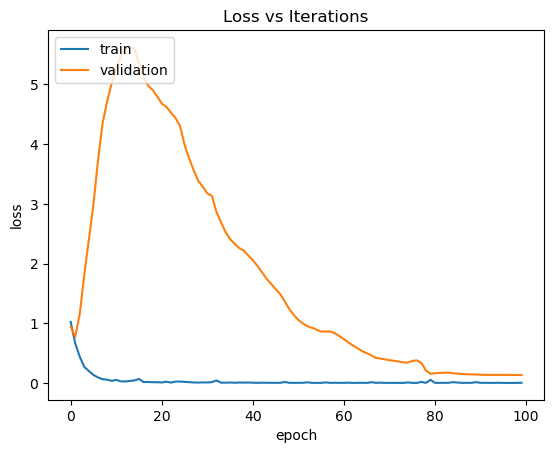

In [16]:
plt.plot(testing.history['loss'])
plt.plot(testing.history['val_loss'])
plt.title('Loss vs Iterations')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [17]:
model.evaluate(X2_test,y2_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 0.9753 - precision: 0.9630 - recall: 0.9630


[0.1335313320159912,
 0.9753086566925049,
 0.9629629850387573,
 0.9629629850387573]

Accuracy: 95.06%